ah yes.... the infamous iris species project thingy

In [2]:
# how do I load a dataset? LOL 

# maybe let's start with actually looking at the csv file lines... 

import torch
import pandas as pd

csv_path = 'Iris.csv'
df = pd.read_csv(csv_path)

let's take a look at the data set - shape property shows # lines, rows

In [3]:
# let's take a look at the data set
print(df.head(10))
print(df.shape) # (150 lines, 6 rows) - oh that's cool, shape property.

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
(150, 6)


want to find:
- species categories, 
- the average, min/max, of sepal and petal

unique number of species:

In [4]:
# want to find:
#   species categories, 
#   the average, min/max, of sepal and petal

# unique number of species -- 
print(df['Species'].unique())
print(df['Species'].nunique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3


In [5]:
# want to see: 
# iris-setosa: average, min/max, 
# etc. 

# groupby omg, i forgot about groupby. 

print(df.groupby('Species')['SepalLengthCm'].mean())

Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64


In [7]:
print(df.groupby('Species').mean())

                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


In [8]:
print(df.groupby('Species').max())

                  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                       
Iris-setosa       50            5.8           4.4            1.9           0.6
Iris-versicolor  100            7.0           3.4            5.1           1.8
Iris-virginica   150            7.9           3.8            6.9           2.5


In [11]:
print(df.groupby('Species').min())

                  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                       
Iris-setosa        1            4.3           2.3            1.0           0.1
Iris-versicolor   51            4.9           2.0            3.0           1.0
Iris-virginica   101            4.9           2.2            4.5           1.4


In [13]:
print(df.groupby('Species').count())

                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                      
Iris-setosa      50             50            50             50            50
Iris-versicolor  50             50            50             50            50
Iris-virginica   50             50            50             50            50


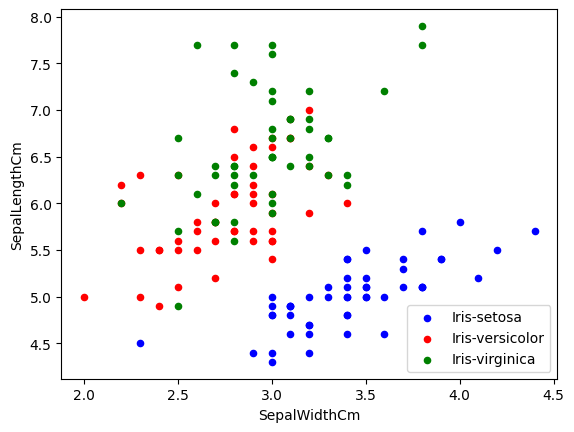

In [19]:
# now i want to plot each of the data on a chart, with different colours. 

ax = df[df['Species'] == 'Iris-setosa'].plot.scatter(x='SepalWidthCm', y='SepalLengthCm', color='Blue', label='Iris-setosa')
bx = df[df['Species'] == 'Iris-versicolor'].plot.scatter(x='SepalWidthCm', y='SepalLengthCm', color='Red', label='Iris-versicolor', ax=ax)
cx = df[df['Species'] == 'Iris-virginica'].plot.scatter(x='SepalWidthCm', y='SepalLengthCm', color='Green', label='Iris-virginica', ax=bx)